# Principal Component Analysis

PCA, or Principal Component Analysis, is a dimensionality reduction technique used in the fields of machine learning and statistics. It's especially popular for visualization, noise filtering, feature extraction, and stock market predictions, among other applications. 

The main idea behind PCA is to transform the original variables into a new set of variables, the principal components, which are orthogonal (perpendicular) to each other, and which reflect the maximum variance in the data.

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

sns.set(font_scale=1.5)
sns.set_style("whitegrid", {'grid.linestyle':'--'})

Below we will show a 2D data, where $x_1$ and $x_2$ are highly correlated. This is a perfect use case for PCA, where we can project the 2D data onto a 1D plane (line) without losing too much information.

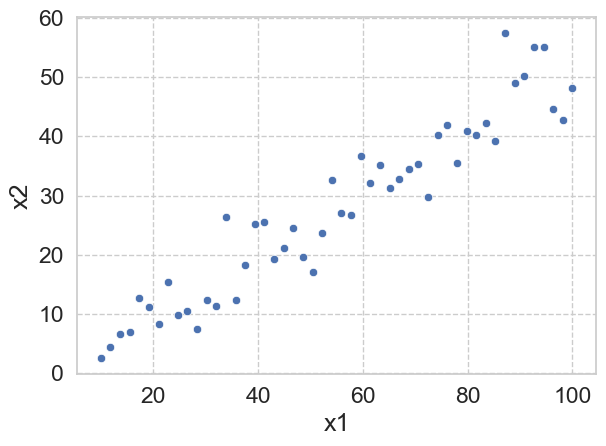

In [2]:
x1 = np.linspace(start=10, stop=100, num=50)
x2 = 0.5 * x1 + np.random.normal(scale=5, size=len(x1))

plt.figure()

sns.scatterplot(x=x1, y=x2)

plt.gca().set_xlabel("x1")
plt.gca().set_ylabel("x2")
plt.tight_layout()

Below we will show the process of PCA with the Auto MPG data, and compute the reconstruction error.

In [3]:
# use the auto data as the example
auto = pd.read_csv("https://raw.githubusercontent.com/changyaochen/MECE4520/master/data/auto_mpg.csv")
auto.dropna(inplace=True)  # for the sake of simplicity
auto.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model,origin,car
0,18.0,8.0,307.0,130.0,3504.0,12.0,70.0,1.0,chevrolet chevelle malibu
1,15.0,8.0,350.0,165.0,3693.0,11.5,70.0,1.0,buick skylark 320
2,18.0,8.0,318.0,150.0,3436.0,11.0,70.0,1.0,plymouth satellite
3,16.0,8.0,304.0,150.0,3433.0,12.0,70.0,1.0,amc rebel sst
4,17.0,8.0,302.0,140.0,3449.0,10.5,70.0,1.0,ford torino


In [4]:
# scale the input
from sklearn.preprocessing import StandardScaler

X = auto[["displacement", "horsepower", "weight", "acceleration"]].values

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
X_scaled

array([[ 1.07728956,  0.66413273,  0.62054034, -1.285258  ],
       [ 1.48873169,  1.57459447,  0.84333403, -1.46672362],
       [ 1.1825422 ,  1.18439658,  0.54038176, -1.64818924],
       ...,
       [-0.56847897, -0.53247413, -0.80463202, -1.4304305 ],
       [-0.7120053 , -0.66254009, -0.41562716,  1.11008813],
       [-0.72157372, -0.58450051, -0.30364091,  1.40043312]])

In [5]:
# perform SVD
n = len(X_scaled)
U, S, Vh = np.linalg.svd(X_scaled.T @ X_scaled / n)

In [6]:
# calculate reconstruction error
all_errors = []
for k in range(1, len(U) + 1):
    U_reduced = U[:, :k]
    Z = X_scaled @ U_reduced
    X_approx = Z @ U_reduced.T
    error = (
        np.sum(np.square(np.linalg.norm((X_scaled - X_approx), ord=2, axis=1))) 
        / np.sum(np.square(np.linalg.norm(X_scaled, ord=2, axis=1)))
    )
    all_errors.append(error)

all_errors

[0.19776570529397033,
 0.03425025083897679,
 0.013511965150122119,
 8.495786775001337e-32]

In [7]:
# A different way to calcuate the error
for i in range(len(S)):
    print(1 - np.sum(S[:(i + 1)])/ np.sum(S))

0.1977657052939703
0.034250250838976704
0.013511965150122096
0.0
